##### Train a model using Universal Bank records, and classify the customer is eligible to take Credit Card or not.

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv("D:\\DATA_SCIENCE\\DATA_ANALYTICS\\UniversalBank_SVM.csv")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
# Checking for null values
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
# Dropping ID and ZIP Code columns from the dataset
df1 = df.drop(["ID","ZIP Code"], axis = 1)
df1.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


#### Heatmap

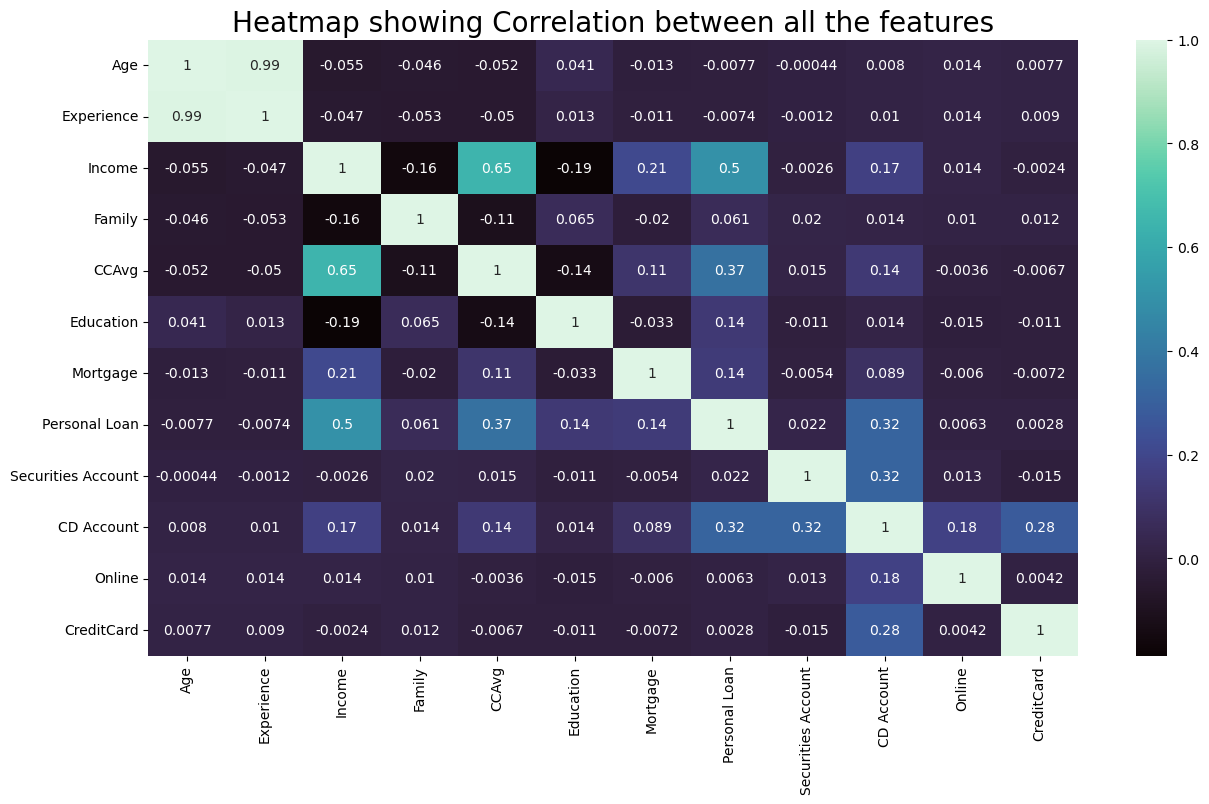

In [9]:
#Plotting the Heatmap to see the correlations between features.
plt.figure(figsize=(15,8))
plt.title("Heatmap showing Correlation between all the features", fontsize=20)
sns.heatmap(df1.corr(),annot = True, cmap='mako')
plt.show()

In [10]:
#Separating the class 0 and class 1 CreditCard data
zero_class = df1[df1.CreditCard==0]
zero_class.shape

(3530, 12)

In [11]:
one_class = df1[df1.CreditCard==1]
one_class.shape

(1470, 12)

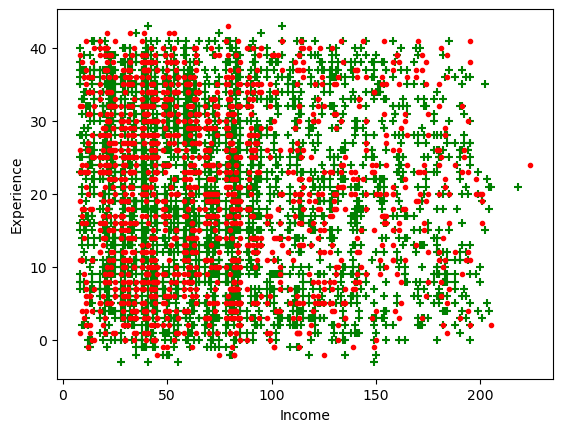

In [12]:
# Income vs Experience scatter plot
plt.xlabel('Income')
plt.ylabel('Experience')
plt.scatter(zero_class['Income'],zero_class['Experience'], color = 'green', marker='+')
plt.scatter(one_class['Income'], one_class['Experience'], color = 'red', marker='.')
plt.show()

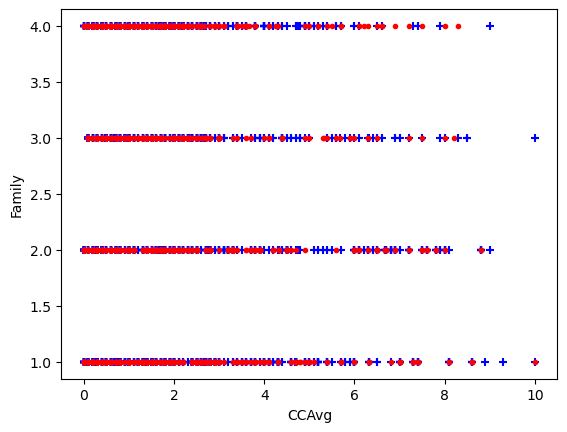

In [13]:
# CCAvg vs Family scatter plot
plt.xlabel('CCAvg')
plt.ylabel('Family')
plt.scatter(zero_class['CCAvg'],zero_class['Family'], color = 'blue', marker='+')
plt.scatter(one_class['CCAvg'], one_class['Family'], color = 'red', marker='.')
plt.show()

In [14]:
#Scaling the data
#Here we can see our data is not in the same range. So, We need to scale our data in same range for that we will use Standard Scaler technique.
#By using Standard scalar we get mean=0 varience=1.

In [15]:
# Scaling the data using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit(df1.drop('CreditCard',axis=1)).transform(df1.drop('CreditCard',axis=1))
df_scaled = pd.DataFrame(scaled, columns=df1.columns[:-1])
df_scaled.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online
0,-1.774417,-1.666078,-0.538229,1.397414,-0.193385,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618
1,-0.029524,-0.096330,-0.864109,0.525991,-0.250611,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618
2,-0.552992,-0.445163,-1.363793,-1.216855,-0.536736,-1.049078,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618
3,-0.901970,-0.968413,0.569765,-1.216855,0.436091,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618
4,-0.901970,-1.055621,-0.625130,1.397414,-0.536736,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618


In [16]:
# Splitting the columns in to dependent variable (x) and independent variable (y).
x = df_scaled
y = df1['CreditCard']

In [17]:
#Now we will implement SVM on the dataset
# Split data in to train and test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [18]:
x_train.size,y_train.size

(44000, 4000)

In [19]:
x_train

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online
2913,-0.552992,-0.706788,0.026631,0.525991,0.224358,0.141703,-0.555524,-0.325875,-0.341423,-0.253540,0.821951
3275,-1.163704,-1.055621,-0.190623,-1.216855,-0.422286,-1.049078,2.079584,-0.325875,-0.341423,-0.253540,0.821951
775,1.715370,1.647835,-1.103089,0.525991,-0.708412,0.141703,-0.555524,-0.325875,-0.341423,-0.253540,-1.216618
217,-0.552992,-0.532371,0.004906,0.525991,0.607766,-1.049078,-0.555524,-0.325875,-0.341423,-0.253540,-1.216618
1245,0.057721,0.078086,-0.712032,-1.216855,-0.307836,1.332484,0.703035,-0.325875,-0.341423,-0.253540,0.821951
...,...,...,...,...,...,...,...,...,...,...,...
4931,1.017412,0.601336,-0.407877,-1.216855,-0.307836,1.332484,-0.555524,-0.325875,-0.341423,-0.253540,0.821951
3264,1.889859,1.822251,0.873921,1.397414,0.264416,1.332484,-0.555524,-0.325875,-0.341423,-0.253540,0.821951
1653,-1.687172,-1.666078,-1.081363,-0.345432,-0.593961,1.332484,0.653872,-0.325875,-0.341423,-0.253540,-1.216618
2607,1.017412,1.124585,-0.538229,1.397414,-0.250611,-1.049078,1.548629,-0.325875,2.928915,3.944146,0.821951


In [20]:
y_train

2913    1
3275    0
775     1
217     0
1245    0
       ..
4931    0
3264    0
1653    1
2607    1
2732    0
Name: CreditCard, Length: 4000, dtype: int64

In [21]:
# Apply SVM Model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC() 
svc.fit(x_train, y_train)
y_pred=svc.predict(x_test)
print('Model accuracy : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy : 0.749


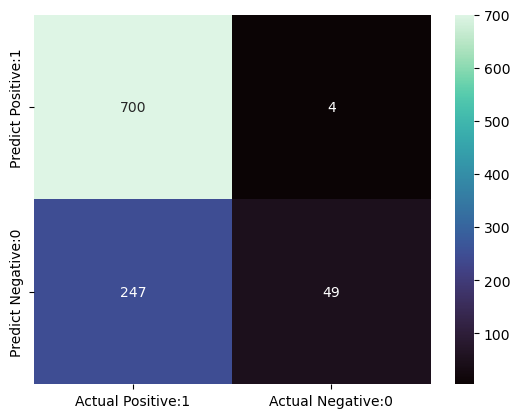

In [22]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')
plt.show()

In [23]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       704
           1       0.92      0.17      0.28       296

    accuracy                           0.75      1000
   macro avg       0.83      0.58      0.56      1000
weighted avg       0.79      0.75      0.68      1000



#### SVM Kernel Functions
A kernel is a function used in SVM for helping to solve problems. With the help of kernel we can go to higher dimensions and perform smooth calculations. We can go up to an infinite number of dimensions using kernels. Kernel plays a vital role in classification and is used to analyze some patterns in the given dataset. They are very helpful in solving a non-linear problem by using a linear classifier.

Sometimes, we cannot have a hyperplane for certain problems. This problem arises when we go up to higher dimensions and try to form a hyperplane. We have various svm kernel functions to convert the non-linear data to linear.we have 8 such popular svm kernel functions.

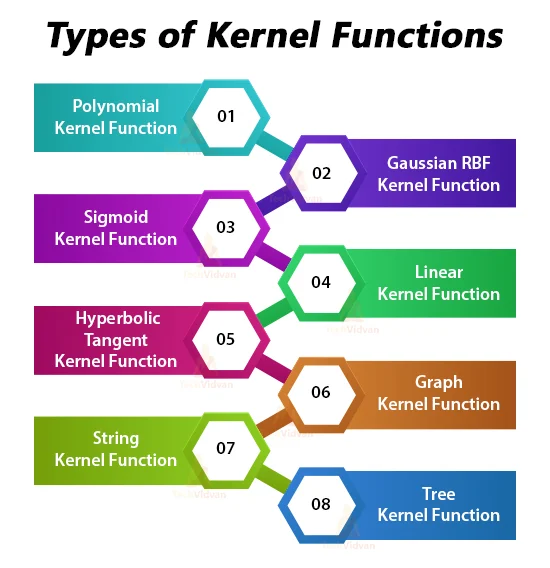

#### Linear kernel function

In [27]:
# Apply SVM model using Linear Kernel function 
#GAMMA and C doesn't have any role to play when the kernel is "linear" in nature
linear_classifier=SVC(kernel='linear').fit(x_train,y_train)
y_pred = linear_classifier.predict(x_test)
print('Model accuracy with linear kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with linear kernel : 0.747


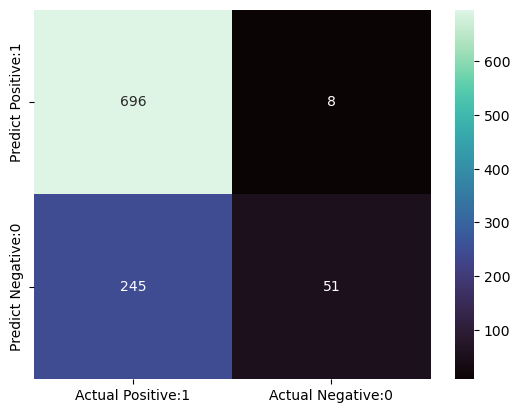

In [28]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')
plt.show()

In [29]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       704
           1       0.86      0.17      0.29       296

    accuracy                           0.75      1000
   macro avg       0.80      0.58      0.57      1000
weighted avg       0.78      0.75      0.68      1000



#### Gaussian RBF kernel function

In [31]:
# Apply SVM model using Gaussian RBF kernel function 
#A high value of C forces the model to fit the training data closely, even if it results in a smaller margin. This may lead to overfitting.
#A low value of C allows for a larger margin, even if it means some misclassification. This might lead to underfitting but better generalization.
#A high value of gamma means that the influence of each training point is small, resulting in a more complex decision boundary. This can lead to overfitting.
#A low value of gamma means that the influence reaches further, creating a smoother decision boundary and can help prevent overfitting.
rbf_svc=SVC(kernel='rbf',C=0.01,gamma=1,class_weight='balanced').fit(x_train,y_train)
y_pred = rbf_svc.predict(x_test)
print('Model accuracy with rbf kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with rbf kernel : 0.704


In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01],
    'gamma': [1],
    'kernel': ['rbf']
}

grid_search = GridSearchCV(SVC(class_weight='balanced'), param_grid,cv=10)
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
print('Best Model Accuracy:', accuracy_score(y_test, y_pred))

Best Model Accuracy: 0.704


In [33]:
rbf_svc = SVC(kernel='rbf', C=1, gamma=0.01, class_weight='balanced', probability=True).fit(x_train, y_train)
y_probs = rbf_svc.predict_proba(x_test)[:, 1]  # Probabilities for the positive class

threshold = 5  # Adjust this to find an optimal value
y_pred_adjusted = (y_probs >= threshold).astype(int)

print('Adjusted threshold model accuracy:', accuracy_score(y_test, y_pred_adjusted))

Adjusted threshold model accuracy: 0.704


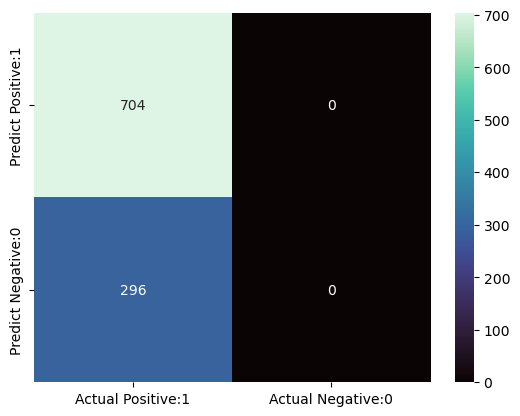

In [34]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')
plt.show()

In [35]:
print(cm)

[[704   0]
 [296   0]]


In [36]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      1.00      0.83       704
           1       0.00      0.00      0.00       296

    accuracy                           0.70      1000
   macro avg       0.35      0.50      0.41      1000
weighted avg       0.50      0.70      0.58      1000



#### Polynomial Kernel function

In [38]:
# Apply SVM model using Polynomial Kernel function
Poly_svc=SVC(kernel='poly').fit(x_train,y_train)
y_pred = Poly_svc.predict(x_test)
print('Model accuracy with rbf kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with rbf kernel : 0.749


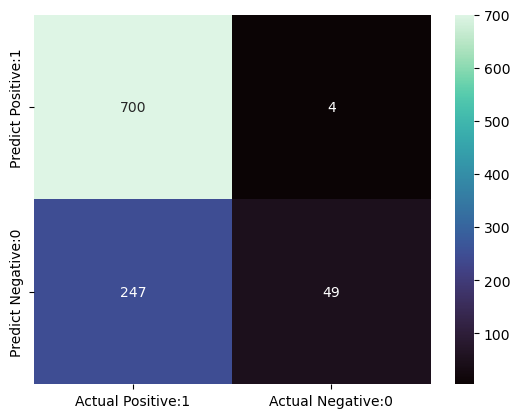

In [39]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')
plt.show()

In [40]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       704
           1       0.92      0.17      0.28       296

    accuracy                           0.75      1000
   macro avg       0.83      0.58      0.56      1000
weighted avg       0.79      0.75      0.68      1000



#### Sigmoid Kernel function

In [42]:
# Apply SVM model using Sigmoid Kernel function
Poly_svc=SVC(kernel='sigmoid',C=1,gamma=0.01).fit(x_train,y_train)
y_pred = Poly_svc.predict(x_test)
print('Model accuracy with rbf kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with rbf kernel : 0.747


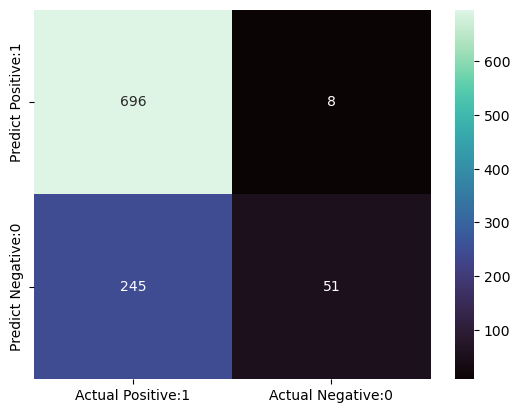

In [43]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')
plt.show()

In [44]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85       704
           1       0.86      0.17      0.29       296

    accuracy                           0.75      1000
   macro avg       0.80      0.58      0.57      1000
weighted avg       0.78      0.75      0.68      1000



##### Among all these above kernels Gaussian RBF kernel is giving more accurate Prediction. The model accuracy with Gaussian RBF kernel is 0.749